In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter='\s+', names=column_names)

In [35]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
np.shape(df)

(506, 14)

In [37]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

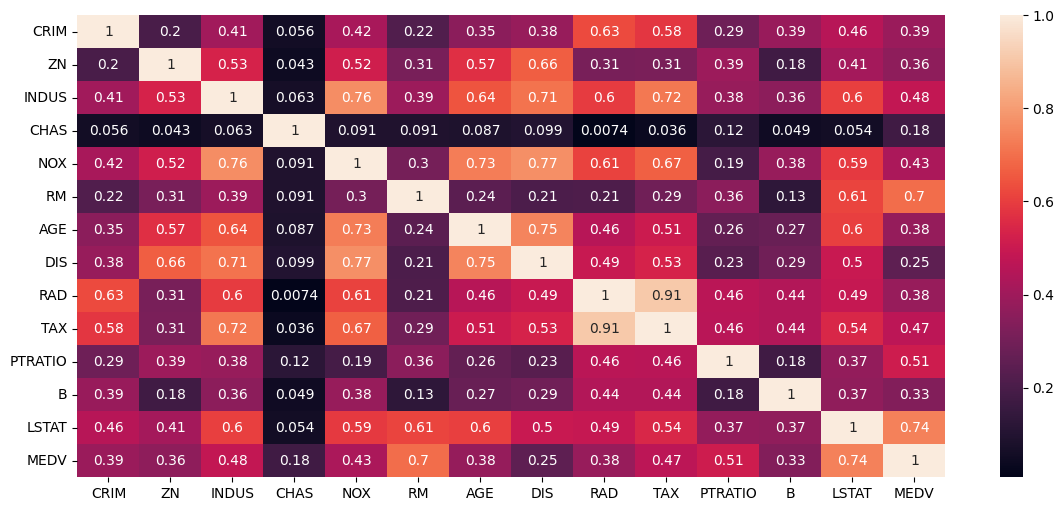

In [48]:
corr = df.corr().abs()

plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot=True)

In [49]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(13,), name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(32, activation='relu', name='dense_3'))
model.add(Dense(1, activation='relu', name='dense_output'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_output (Dense)        (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 40ms/step - loss: 0.1133 - mae: 0.2574 - val_loss: 15.4194 - val_mae: 2.5753
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0974 - mae: 0.2213 - val_loss: 14.8921 - val_mae: 2.5613
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0990 - mae: 0.2403 - val_loss: 14.9547 - val_mae: 2.5205
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0660 - mae: 0.1948 - val_loss: 15.0042 - val_mae: 2.5676
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0762 - mae: 0.1953 - val_loss: 15.1968 - val_mae: 2.5636
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0701 - mae: 0.1936 - val_loss: 14.8354 - val_mae: 2.4904
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0833 - mae: 0.2207 - val_loss: 15.2498 - val_mae: 2.5620
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 0.1035 - ma

In [82]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print(f'Mean squared error : {mse_nn}\nMean absolute error : {mae_nn}')

4/4 [==============================] - 0s 4ms/step - loss: 11.0455 - mae: 2.4069
Mean squared error : 11.045483589172363
Mean absolute error : 2.4069254398345947


In [83]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

4/4 [==============================] - 0s 4ms/step


3.3234744147310984

In [85]:
new_input = np.array([[0.006, 18.0, 2.3, 0.0, 0.53, 6.5, 65.2, 4.0, 1.0, 296.0, 15.0, 396.9, 4.98]])
predictions = model.predict(new_input)
print("Predicted house price:", predictions[0][0])

1/1 [==============================] - 0s 35ms/step
Predicted house price: 29.603678
